## Report Topic01 - Team 03:  
# **The implementation and evaluation of otsu thresholding**
### Data Analysis project, B.Sc.Molekulare Biotechnologie

#### **Supervisor:** PD Dr. Karl Rohr

#### **Team:** *Franka Begall, Kira Effenhauser, Selina Geiger, Anna-Lena Schulz*

#### **Tutor:** *Hannah Winter*

#### 19.07.2023


## Abstract

## Table of contents

1. [Introduction](#introduction)<br>
2. [Description of the Datasets](#2-description-of-the-datasets)<br>
    2.1. [N2DH-GOWT1](#21-n2dh-gowt1)<br>
    2.2. [N2DL-HeLa](#22-n2dl-hela)<br>
    2.3. [NIH3T3](#23-nih3t3)<br>
3. [Methods](#3-methods)<br>
    3.1. [Preprocessing](#31-preprocessing)<br>
      3.1.1. [Mean filter](#311-mean-filter)<br>
        3.1.2. [Median filter](#312-median-filter)<br>
        3.1.3. [Gaussian filter](#313-gaussian-filter)<br>
        3.1.4. [Histogram stretching](#314-histogram-stretching)<br>
    3.2. [Thresholding](#32-thresholding)<br>
    3.2.1. [Otsu thresholding](#321-otsu-thresholding)<br>
    3.2.2. [Multi otsu](#322-multi-otsu)<br>
    3.2.3. [Local thresholding](#323-local-thresholding)<br>
    3.3. [Evaluation](#33-evaluation)<br>
    3.3.1. [Dice Score](#331-dice-score)<br>
4. [Results](#4-results)<br>
    4.1. [Otsu-thresholding combined with different preprocessing methods](#41-otsu-thresholding-combined-with-different-preprocessing-methods)<br>
    4.2. [Comparism of Otsu thresholding, two-level-Otsu thresholding and local adaptive thresholding](#42-comparism-of-otsu-thresholding-two-level-otsu-thresholding-and-local-adaptive-thresholding)<br>
5. [Discussion](#5-discussion)<br>
6. [Conclusion](#6-conclusion)<br>
7. [Bibliography](#7-Bibliography) 



## 1. Introduction 
Image segmentation is a research hotspot in computer vision. It allows the subdivision of an image into segments with higher information content (Yu *et al*, 2023). In biomedical application each segment displays a different object or structure of interest which is essential for diagnosis and treatment planning (Xu *et al.*, 2022). Microscope images of cell nuclei are often processed with image segmentation to count cells, differentiate them from certain bright spots or determine their size. <p>
An often used and important technique for image segmentation is thresholding. Otsu´s method is very common as it gives reliable results while still being fast. The automatically generated threshold separates the image into two groups resulting in a binary image where the objects are clearly separated from the background (Bangare *et al.*, 2015). For even better results you can extend Otsu´s method to two-level-Otsu thresholding or local adaptive thresholding. These techniques adapt more effectively to the images because they do not rely on only one threshold. <p>
Images, especially in biomedical context, are often distorted by noise caused by transmission and procurement. This also applies for the images of the three datasets used in this project. Challenges such as bright spots, low contrast and noise need to be eliminated to differentiate cells from the background. Different filters were used to master these challenges and improve the quality and reorganisation of the images. This is important in biomedical application because it increases the diagnostic value of the image (Bharati and Podder, 2020). <p>
To evaluate the performance of the different preprocessing methods as well as the thresholding techniques we used the dice score. By comparing the segmented image to the ground truth image the dice score evaluates how effective the preprocessing was.

## 2. Description of the Datasets
For this project the data consists of three different, publicly available datasets, each showing cell nucleii. All of the datasets consist of the original images, as well as the ground truth images, which can be used to evaluate the implemented segmentation algorithm. 
### 2.1. N2DH-GOWT1
The first set of data contains six images of N2DH-GOWT1 mouse embryonic stem cells, which were stained by using a green flourescent protein targeted against the transcription facor Oct4. These images were captured using timelapse confocal microscopy and have a size of 1024x1024 pixels. The low contrast to the background and image noise are the main challlenges this datasets presents.
### 2.2. N2DL-HeLa
Dataset 2 contains four images of human N2DL-HeLa cells of cervical cancer with a size of 1100x700 pixels. The staining of these nuclei was also executed by using a green fluorescent protein, but targeted against H2b. The images were capured by an Olympus lx81 microscope used for live imaging of fluorescently labeled chromosomes. The main challenge this dataset presents is the low contrast.
### 2.3. NIH3T3
The last dataset consists of 18 images of mouse embryonic fibroblast cells which were visualized via Hoechst staining and captured with a fluorescence microscope. The size of these images is 1344x1024 pixels. A challenge this dataset embodies is the varying brigntness of the cell nucleii, as well as reflections, appearing as bright spots in the images.




## 3. Methods
To achieve an optimal image for applying the otsu thresholding algorithm we tested different preprocessing methods and compared how they performed when applied to each datatset by using the dice score as an evaluation method. 
### 3.1. Preprocessing
#### 3.1.1. Mean filter
The mean filter is used to blur an image in order to remove noise which is achieved by reducing the intensity variation between a pixel and its neighbors. At first the mean of the pixel values within a n x n kernel is determined and then the pixel intensity of the center element is replaced by the mean. However, this filter is strongly affected by outliers (pixels with a very unrepresentative value). A single outlier can significantly affect the mean value of all the pixels in its neighborhood. 
#### 3.1.2. Median filter
Compared to the mean filter, the median filters evades the problem of outliers. It ranks the intensities of all pixels within a predefined n x n neighborhood for each pixel. The median of this series then replaces the intesity value of the central pixel. It is especially useful when trying to reduce impulsive noise (e.g. salt and pepper noise).
#### 3.1.3. Gaussian filter
The Gaussian filter is used to blur images and remove noise and detail. The Gaussian kernel has the shape of the two-dimensional zero-mean Gaussian Function (bell-shape), which means pixels in the centre affect the new value of the central pixel more, than pixels further out. 
$$
G_\sigma(x,y) = \frac{1}{\sigma^2 2\pi}  e^\frac {-(x^2 + y^2)}{2\sigma^2} \\
$$
The intensity of the blurring effect depends on the standard deviation $\sigma$, a higher $\sigma$ will lead to a stronger blurring effect.
#### 3.1.4. Histogram stretching
Histogram stretching describes a linear scaling method to enlarge the contrast of an image.
To perform histogram stretching, the intesity values of the pixels are stretched out, ranging from a desired minimum to a desired maximum (e.g. 0 to 255), this defines the lower and the upper limit *a* and *b*. Values below *a* are set to *a* and values above *b* are set to *b*. *c* and *d* represent the current minimum and maximum intensity values in the image. $P_{in}$ stands for the pixel intesity value before the stretching is performed.
$$
P_{out} = (P_{in} - c) \frac{(b-a)}{(d-c)} + a
$$
### 3.2. Thresholding
Thresholding is used for the segmentation of images. Starting from a grayscale image it creates a binary image by setting all pixels whose intenisty values are above a certain threshold to a foreground value and all those whose values are below the threshold to a background value. 
#### 3.2.1. Otsu thresholding
Defining a threshold can be very challenging if you do not have an image with a perfect bimodal distribution of pixel intensities. A bimodal distribution allows you to select your threshold easily by choosing the lowest point between the two peaks of your histogram for the threshold. Otsu´s method selects a threshold automatically by either minimizing the within class variance or maximizing the between class variance of the pixel intensities of your grayscale image no matter how many peaks your histogram has. The pixels are assigned new intensities according to the threshold: pixels with higher intensities than the threshold or the same intensity turn white, pixels with a lower intensity turn black. By performing this method your objects will be separated from the background of your image. 
The algorithm used in this project computes the within-class variances by iterating over all possible thresholds. The within-class variance $\sigma_w$ is calculated from the probability of class occurrence $\omega$ and the class variance $\sigma_i$ (Otsu, 1979 ). 
$$ 
\sigma_w ^2= \omega_1 * \sigma_1^2 + \omega_2 * \sigma_2^2 \\
$$
To achieve a binary and segmented image the pixels $g_T(x,y)$ are assigned new intensities depending on whether the pixels had a higher, lower, or the same intensity as the threshold $T$. Pixels with a higher or the same intensity are set to 255 respectively 65535 for tif-files, which is equivalent to the objects. Pixels with lower intensities are set to 0, which is equivalent to the background.

$$
g_T (x,y) = \begin{cases}
\text{0  if  $g(x,y) ≤ T$} \\ \text{255 / 65535  if  $g(x,y) > T$} 
\end{cases}
$$
#### 3.2.2. Two-level-Otsu thresholding
Otsu thresholding reaches its limits as soon as you have certain bright spots, reflections or illumination in your image because these pixels tend to get assigned incorrectly. Fortunately, Otsu thresholding can be easily extended to two-level thresholding. By adding another threshold, you can solve that problem and separate bright spots from your objects. You get three different classes of pixels: bright spots, objects, and background. Just like the global Otsu thresholding the threshold is selected by minimizing the within-class variance. 
$$ 
\sigma_w ^2= \omega_1 * \sigma_1^2 + \omega_2 * \sigma_2^2 + \omega_3 * \sigma_3^2 \\
$$
The two-level Ostu thresholding performed in this task works in two different ways: The first algorithm sets the intensities of the pixels whose intensity is higher than or equal to the first threshold and intensities that are between the two thresholds to 255 or 65535 for tif files. The remaining pixels with intensities less than or equal to the second threshold are set to 0. The second alogithm works similar but in this case the intensities of the pixels with a higher intensity than the first threshold are set to 0 intstead of 255 or 65535.
#### 3.2.3. Local adaptive thresholding
While Otsu thresholding and two-level-Otsu provide fast results they reach their limitations if the image contains different lighting conditions throughout the image resulting from a strong illumination gradient or shadows. If a global threshold is used for such an image, this can lead to a loss of information and detail. Local adaptive thresholding is a more sophisticated version of tresholding which evades this problem by setting the threshold dynamically throughout the image. The algorithm iterates over every pixel and assigns each pixel to either a foreground value or a background value. The pixels are compared to the values of other pixels within a n x n predefined neighborhood. This means the threshold is set individually for each pixel depending on the values of its neighborhood. 
### 3.3. Evaluation
To evaluate the perfomance of the implemented algorithm the segmented images were compared to the provided ground truth images.
#### 3.3.1. Dice Score
The Dice Score (DSC) is a measure of similarity between two sets of data. In this case it can be used to evaluate the similarity between the predicted segmentation mask and the ground truth segmentation mask. It ranges from 0 to 1, 0 indicting the thresholding algorithm assigned all pixels to the wrong values and 1 indicating a perfect segmentation.
   $$
    DSC = \frac{2\cdot TP}{2\cdot TP + FP + FN} \\
   $$
To calculate the Dice Score the overlay between the prediction and the ground truth is identified (*TP*), as well as pixels which were falsely assigned as negative (*FN*) and pixels falsely set as positive (*FP*).<p>
Figure 1 illustrates the general steps of image segmentation. The Dice Score is applied to the aglgorithm after the segmentation is performed. If it reaches sufficient values, the segmentation algorithm works well and further steps, like analyizing the characteristics in the segmented image, can be executed. If the Dice Score values are not sufficient, the segmentation algorithm needs further optimisation.






In [10]:
# Figure 1: Visualisation of the general process of image segmentation together with the Dice Score as an evaluation method
from IPython.display import Image
Image('../Bilder Report/DiceScoreBild.png',  width=700, height=400)

FileNotFoundError: No such file or directory: '../Bilder Report/DiceScoreBild.png'

FileNotFoundError: No such file or directory: '../Bilder Report/DiceScoreBild.png'

<IPython.core.display.Image object>

## 4. Results

### 4.1. Otsu thresholding combined with different preprocessing methods




##### **N2DH-GOWT1**


Figure x  visualizes the distribution of the Dice Score values of the combined application of different filters together with histogram stretching and Otsu thresholding. As mentioned above, the mean Dice Score value of the images without any image processing is 0.591961. The mean Dice Score values of Otsu thresholding and Otsu together with a filter and histogram stretching are all located in a small range, starting from 0.909265 (Histo+Median 3x3) and ranging to 0.910804 (Histo+Gauss, sigma = 1) as the highest obtained value. 

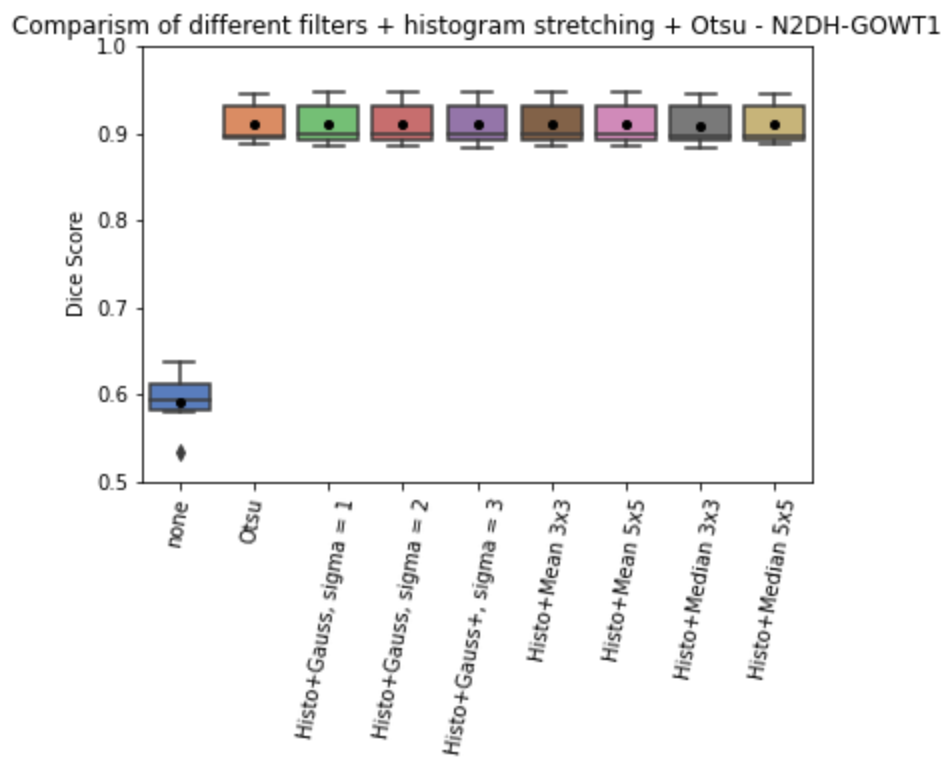

In [11]:
# Figure x: Visualisation of the dice score values achieved via the combination of different filters with histogram stratching and Otsu thresholding applied to N2DH-GOWT1
from IPython.display import Image
Image('../Plots/BilderPlots/N2DH-GOWT1/plot_N2DH-GOWT1_filter_histo_otsu.png',  width=500, height=300)

#### **N2DL-HeLa**


Figure x  was obtained through the combined application of different filters together with histogram stretching and Otsu thresholding and visualizes the distribution of the Dice Score values. As mentioned above, the mean Dice Score value of the images without any image processing is 0.153967. Histogram stretching and the combination of histogram stretching and a Median filter with a kernel size of 5x5 protrude with very high values histogram stretching reaches a value of 0.995984 and histogram stretching combined with the Median filter 5x5 led to the highest possible Dice Score value of 1. All of the other Dice Score values are within a small range between 0.933156 and 0.935381. 

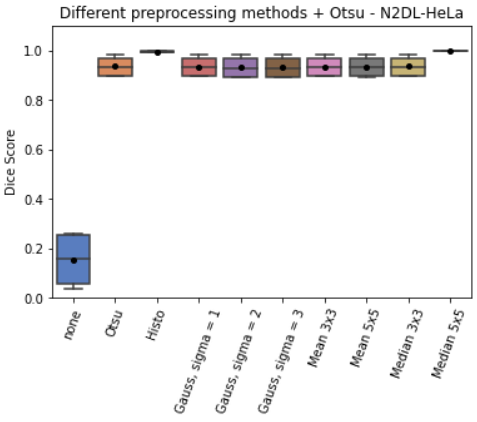

In [12]:
# Figure x: Visualisation of the dice score values achieved via the combination of different filters with histogram stratching and Otsu thresholding applied to N2DL-HeLa
from IPython.display import Image
Image('C:/Users/selig/topic01_team03/Plots/BilderPlots/N2DL-HeLa/plot_N2DL-HeLa_filter_histo_otsu.png',  width=500, height=300)

#### **NIH3T3**


Figure x  visualizes the distribution of the Dice Score values of the combined application of different filters together with histogram stretching and Otsu thresholding. The lowest mean Dice Score was achieved through the combination of Histogram stretching, a Gauss filter with $\sigma$ = 3 and Otsu thresholding with a value of 0.623451. The combined  application of Histogram stretching, a Gauss filter with $\sigma$ = 2 and Otsu thresholding also led to a worse Dice Score (0.680817) when compared to the other obtained values which all range from 0.705433(only Otsu) to 0.713342 (Histogram stretching and Median filter with 3x3 kernel, together with Otsu).  

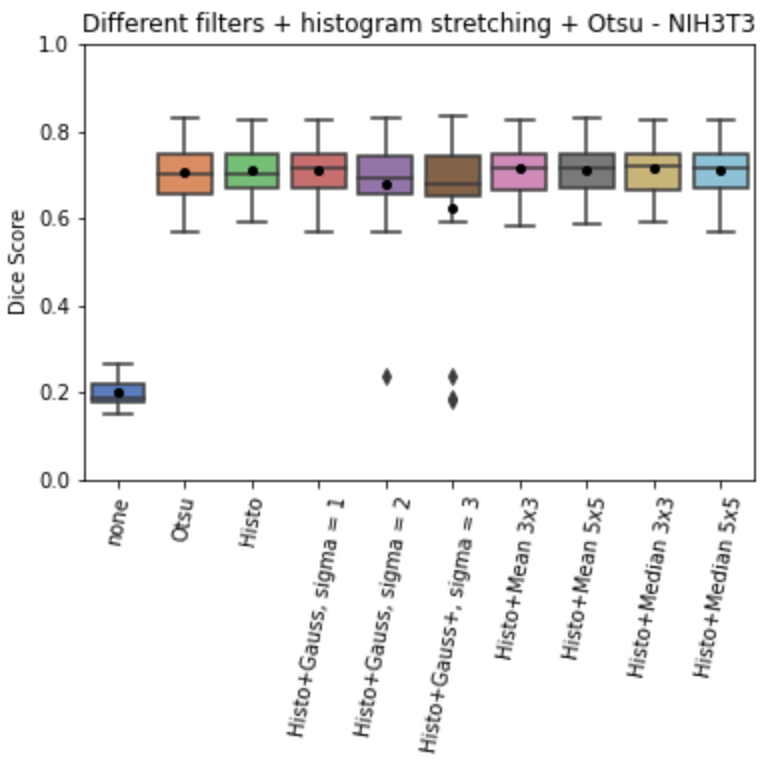

In [13]:
# Figure x: Visualisation of the dice score values achieved via the combination of different filters with histogram stratching and Otsu thresholding applied to NIH3T3
from IPython.display import Image
Image('../Plots/BilderPlots/NIH3T3/plot_NIH3T3_filter_histo_otsu.png',  width=500, height=300)

### 4.2. Comparism of Otsu thresholding, two-level-Otsu thresholding and local adaptive thresholding
To appraise which of the different thresholding techniques produces the best results, Otsu thresholding, two-level-otsu thresholding and local adaptive thresholding were applied to all three sets of data. For evaluation the Dice Score was used to compare the different techniques.
##### **N2DH-GOWT1**<br>
Figure x visualizes the Dice Score values obtained by applying the three different thresholding algorithms to the N2DH-GOWT1 dataset. Local adaptive thresholding led to the worst results with a mean dice score of 0.802870. Two-level-otsu thresholding results in a mean dice score of 0.896784. The highest mean dice score (0.91036) is achieved via Otsu thresholding.

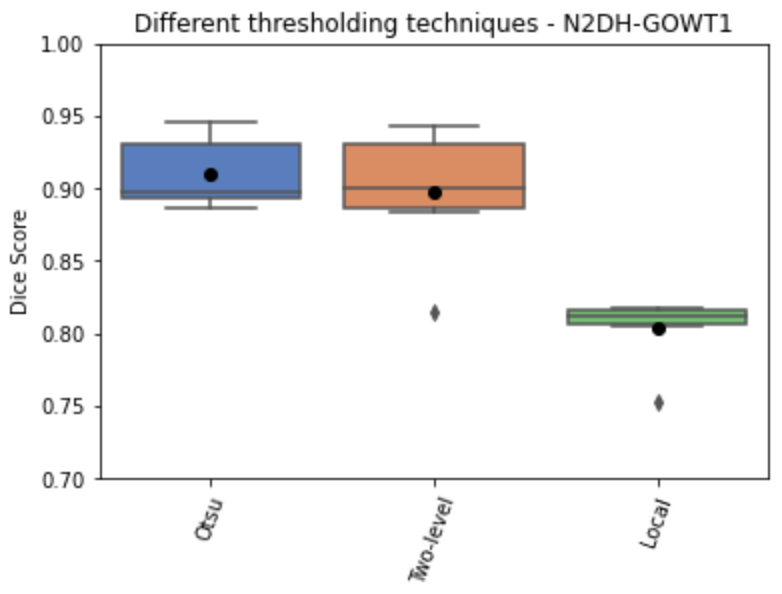

In [14]:
# Figure x: Visualisation of the results achieved through different thresholding techniques applied to N2DH-GOWT1
from IPython.display import Image
Image('../Plots/BilderPlots/N2DH-GOWT1/plot_N2DH-GOWT1_thresholding.png',  width=500, height=300)

## 5. Discussion

## 6. Conclusion

## 7. Bibliography

Yu, Y.; Wang, C.; Fu, Q.; Kou, R.; Huang, F.; Yang, B.; Yang, T.; Gao, M. Techniques and Challenges of Image Segmentation: A Review. Electronics 2023, 12 (5).

Xu, Y.; He, X.; Xu, G.; Qi, G.; Yu, K.; Yin, L.; Yang, P.; Yin, Y.; Chen, H. A Medical Image Segmentation Method Based on Multi-Dimensional Statistical Features. Frontiers in Neuroscience 2022, 16.

Bangare, S. L.; Dubal, A.; Bangare, P. S.; Patil, S. T. Reviewing Otsu’s Method For Image Thresholding. In International Journal of Applied Engineering Research; 2015; Vol. 10, pp 21777–21783. 

Bharati, S.; Podder, P. Performance Analysis of Gaussian, Median, Mean and Weiner Filters on Biomedical Image De-Noising; 2020. 

Otsu, N. A Threshold Selection Method from Gray-Level Histograms. IEEE Transactions on Systems, Man, and Cybernetics 1979, 9 (1), 62–66. 